# Tutorial for collision detection module

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

import pyshipsim
from pyshipsim import simple_ship_poly, detail_ship_poly, rectangle_ship_poly, ellipse_ship_poly 
from utils import font_setting

font_setting()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
ImportError: Import of esso_osaka_3m's f2py mpdule failed.
ImportError: Import of esso_osaka_3m's f2py mpdule failed.
ImportError: Import of takaoki_3m's f2py mpdule failed.


The following three collision detection modules are implemented in `pyshipsim`.
- `SegmentsIntersectCollisionChecker` : Collision detection module based on intersection of ship polygon and obstacle polygon.
- `EnclosingPointCollisionChecker` : Collision detection module based on the vertices of the ship polygon inside the obstacle polygon.
- `StrictCollisionChecker` : Collision detection module based on the above two judgments.

It should be noted that the results are slightly different depending on the collision checker.　The following shows the differences in results depending on the ship polygons and the collision detection method.

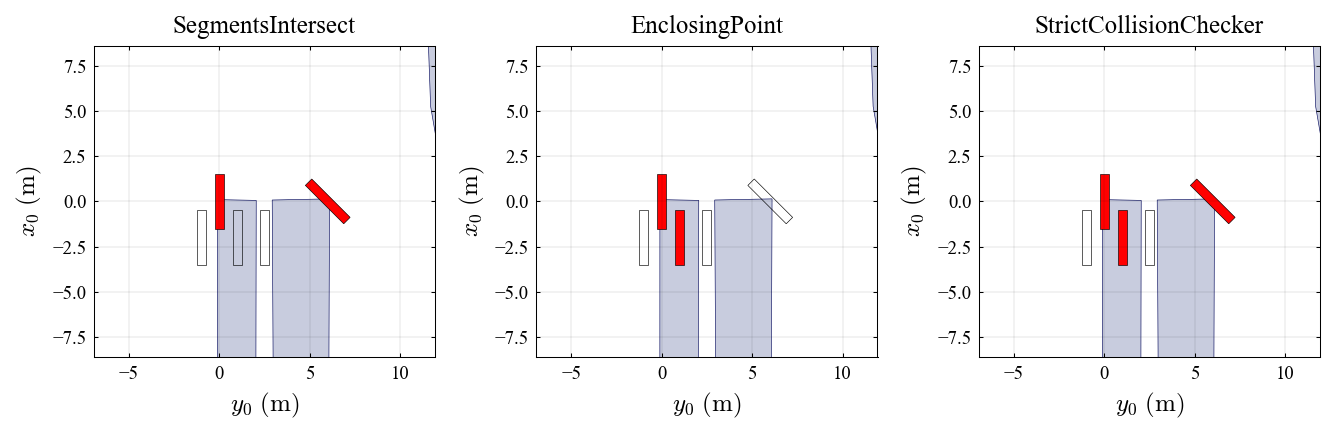

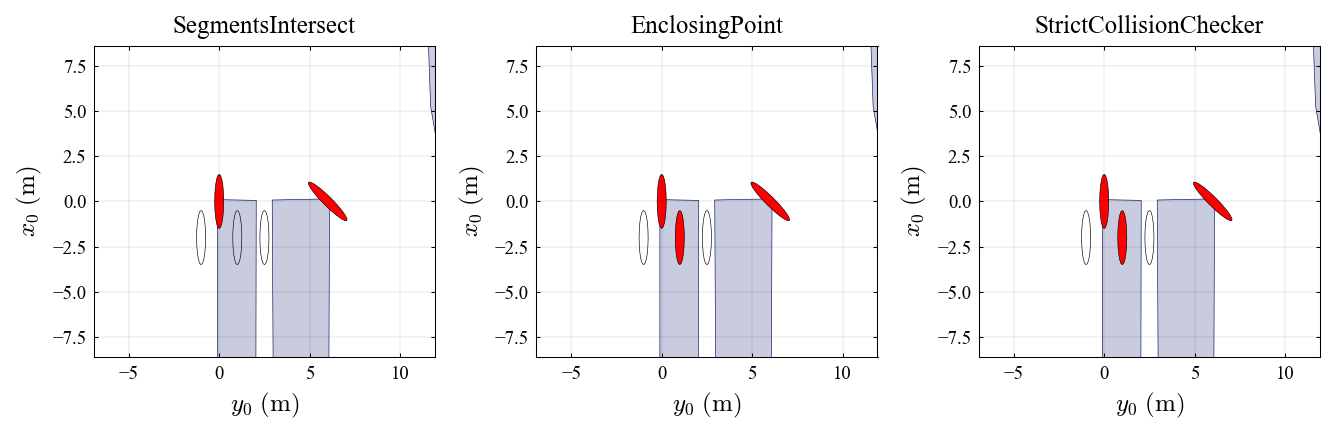

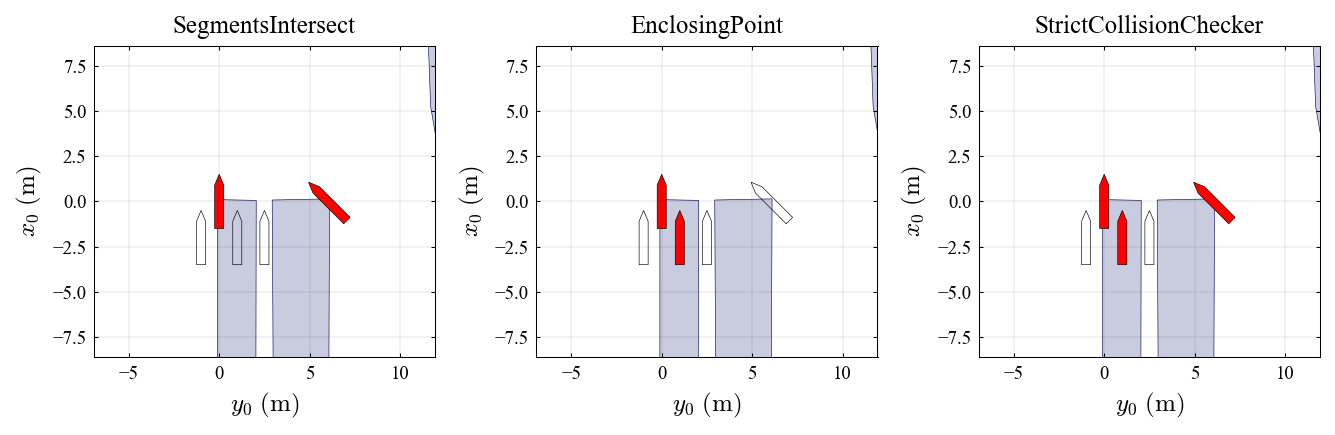

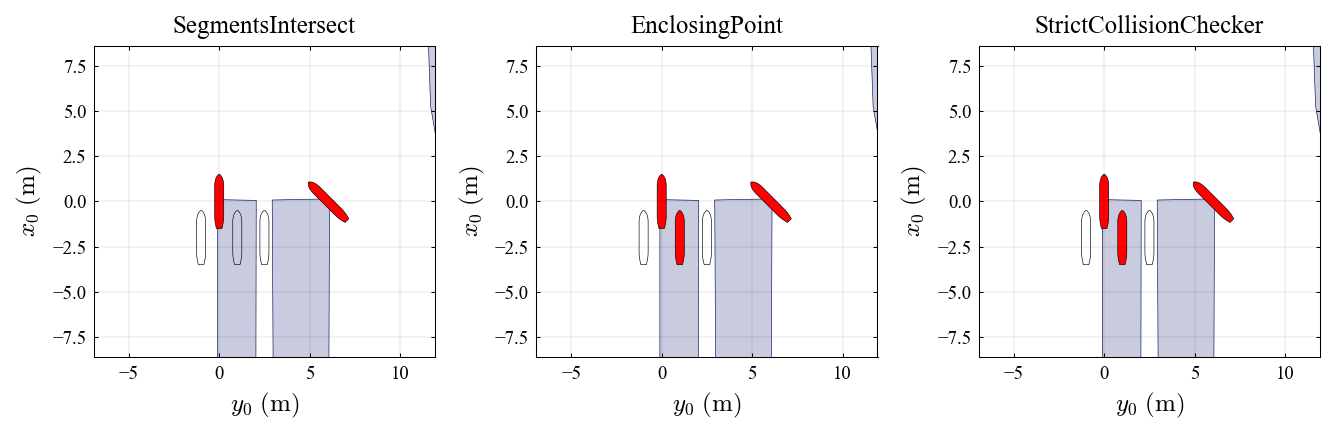

In [2]:
ship_poly_funcs = [
    rectangle_ship_poly,
    ellipse_ship_poly,
    simple_ship_poly,
    detail_ship_poly,
]

for ship_poly_func in ship_poly_funcs:

    fig, axes = plt.subplots(1, 3, figsize=(9, 3), tight_layout=True)

    world_polys = pyshipsim.InukaiPond().OBSTACLE_POLYGONS
    intersect = pyshipsim.SegmentsIntersectCollisionChecker()
    intersect.reset(world_polys)
    enclosing = pyshipsim.EnclosingPointCollisionChecker()
    enclosing.reset(world_polys)
    combine = pyshipsim.StrictCollisionChecker()
    combine.reset(world_polys)

    # world
    kwargs = {"fill": True, "lw": 0.3, "fc": "#C8CCDE", "ec": "#0A0F60"}

    def add_poly(ax, polys):
        for poly in polys:
            poly = poly[:, [1, 0]]
            polygon = plt.Polygon(poly, **kwargs)
            ax.add_patch(polygon)

    add_poly(axes[0], world_polys)
    add_poly(axes[1], world_polys)
    add_poly(axes[2], world_polys)

    eta_list = [
        np.array([0.0, 0.0, 0.0]),
        np.array([0.0, 6.0, -np.pi/4]),
        np.array([-2.0, 2.5, 0.0]),
        np.array([-2.0, 1.0, 0.0]),
        np.array([-2.0, -1.0, 0.0]),
    ]

    for eta in eta_list:
        ship_poly = ship_poly_func(eta=eta, L=3.0, B=0.5)
        # 
        collide = intersect.check(ship_poly)    
        kwargs = {"fill": False, "lw": 0.3, "ec": "black"}
        if collide:
            kwargs = {"fill": True, "lw": 0.3, "fc": "red", "ec": "black"}
        add_poly(axes[0], [ship_poly])
        # 
        collide = enclosing.check(ship_poly)
        kwargs = {"fill": False, "lw": 0.3, "ec": "black"}
        if collide:
            kwargs = {"fill": True, "lw": 0.3, "fc": "red", "ec": "black"}
        add_poly(axes[1], [ship_poly])
        # 
        collide = combine.check(ship_poly)
        kwargs = {"fill": False, "lw": 0.3, "ec": "black"}
        if collide:
            kwargs = {"fill": True, "lw": 0.3, "fc": "red", "ec": "black"}
        add_poly(axes[2], [ship_poly])

    axes[0].set_title("SegmentsIntersect")
    axes[1].set_title("EnclosingPoint")
    axes[2].set_title("StrictCollisionChecker")
    axes[0].set_xlabel("$y_{0} \ \mathrm{(m)}$")
    axes[0].set_ylabel("$x_{0} \ \mathrm{(m)}$")
    axes[0].axis("equal")
    axes[1].set_xlabel("$y_{0} \ \mathrm{(m)}$")
    axes[1].set_ylabel("$x_{0} \ \mathrm{(m)}$")
    axes[1].axis("equal")
    axes[2].set_xlabel("$y_{0} \ \mathrm{(m)}$")
    axes[2].set_ylabel("$x_{0} \ \mathrm{(m)}$")
    axes[2].axis("equal")
    axes[0].set_xlim(-5, 10)
    axes[0].set_ylim(-7, 7)
    axes[1].set_xlim(-5, 10)
    axes[1].set_ylim(-7, 7)
    axes[2].set_xlim(-5, 10)
    axes[2].set_ylim(-7, 7)

    path = f"./log/tutorial_collision/{ship_poly_func.__name__}.png"
    if not os.path.exists(os.path.dirname(path)):
            os.makedirs(os.path.dirname(path))
    fig.savefig(path)

# Image("./log/tutorial_collision/simple_ship_poly.png")
# Image("./log/tutorial_collision/ellipse_ship_poly.png")
# Image("./log/tutorial_collision/simple_ship_poly.png")
# Image("./log/tutorial_collision/detail_ship_poly.png")